In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Trading-features.csv")
df.head()

,id,last_price,created_at,f1,f2,f3,f4,f5,f6,f7,...,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161
0,55466910,43138.2,2023-12-27 12:47:41.916971,0.000463,15139,-43.1,43.0,-0.1,-4.8,-5.1,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
1,55466909,43138.2,2023-12-27 12:47:40.693372,0.000463,15140,-43.1,43.0,-0.1,-4.7,-5.1,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
2,55466908,43138.2,2023-12-27 12:47:39.968797,0.000463,15141,-37.4,43.0,5.6,-1.9,-0.6,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
3,55466907,43138.2,2023-12-27 12:47:38.919784,0.000463,15142,-37.4,37.4,0.0,-3.7,-6.2,...,695.2,-123.8,695.2,-123.8,-123.8,695.2,695.2,-123.8,-123.8,695.2
4,55466906,43132.6,2023-12-27 12:47:37.881533,0.000463,15143,-39.6,36.5,-3.1,-3.7,-9.4,...,689.6,-129.4,689.6,-129.4,-129.4,689.6,689.6,-129.4,-129.4,689.6


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 164 entries, id to f161
dtypes: float64(136), int64(27), object(1)
memory usage: 12.5+ MB


In [4]:
df.describe

<bound method NDFrame.describe of             id  last_price                  created_at        f1     f2    f3  \
0     55466910     43138.2  2023-12-27 12:47:41.916971  0.000463  15139 -43.1   
1     55466909     43138.2  2023-12-27 12:47:40.693372  0.000463  15140 -43.1   
2     55466908     43138.2  2023-12-27 12:47:39.968797  0.000463  15141 -37.4   
3     55466907     43138.2  2023-12-27 12:47:38.919784  0.000463  15142 -37.4   
4     55466906     43132.6  2023-12-27 12:47:37.881533  0.000463  15143 -39.6   
...        ...         ...                         ...       ...    ...   ...   
9995  55456903     42753.6  2023-12-27 10:00:09.874616  0.000414  25191 -29.5   
9996  55456902     42753.6  2023-12-27 10:00:08.803069  0.000414  25192 -29.5   
9997  55456901     42753.6  2023-12-27 10:00:07.957261  0.000414  25193 -36.7   
9998  55456900     42753.7  2023-12-27 10:00:06.730827  0.000414  25194 -36.7   
9999  55456899     42765.6  2023-12-27 10:00:05.707968  0.000414  25196 -36

In [5]:
df.isnull().sum()

id            0
last_price    0
created_at    0
f1            0
f2            0
             ..
f157          0
f158          0
f159          0
f160          0
f161          0
Length: 164, dtype: int64

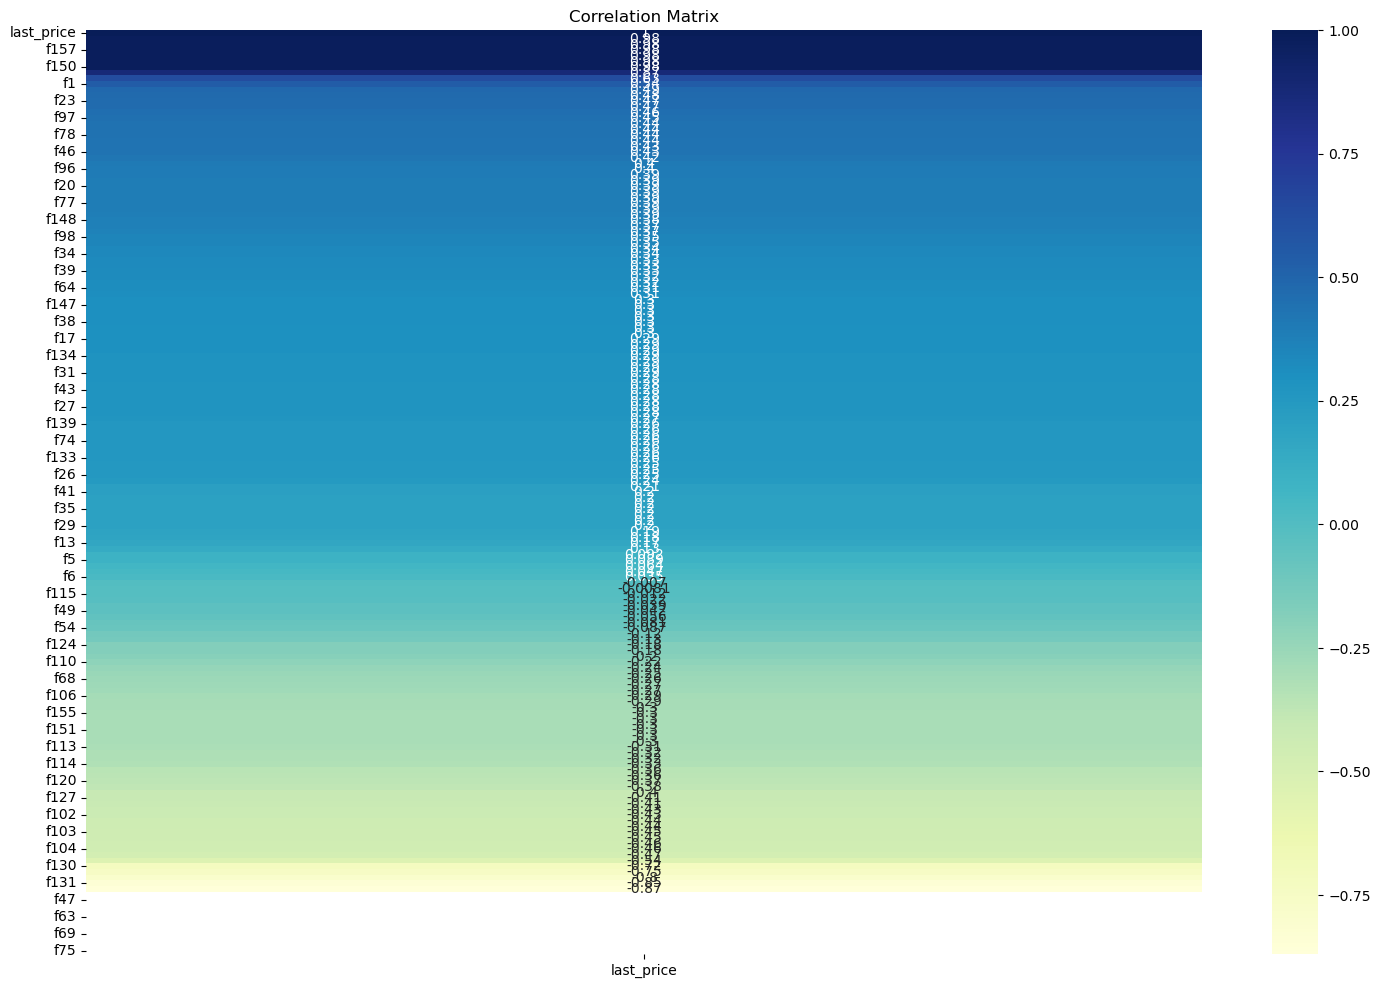

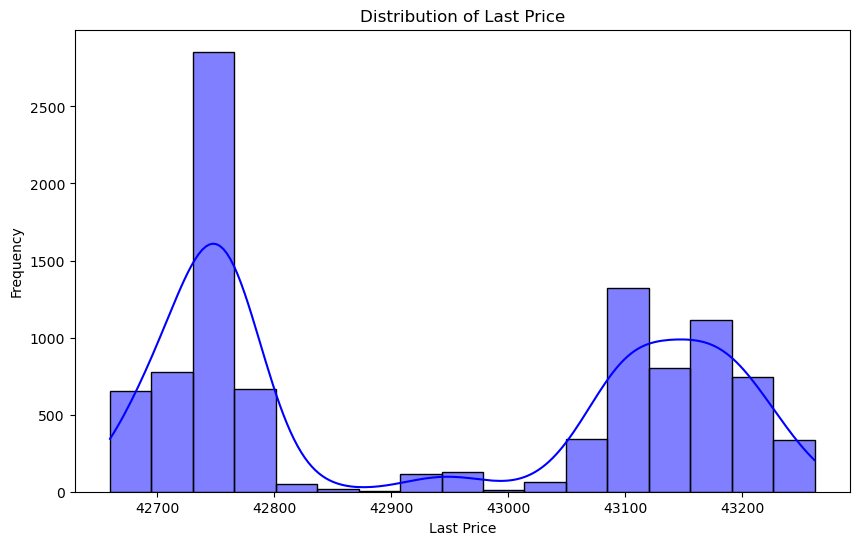

In [6]:
# Exclude non-numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix[['last_price']].sort_values(by='last_price', ascending=False),
            cmap="YlGnBu", annot=True)
plt.title('Correlation Matrix')
plt.show()

# Distribution of Target Variable
plt.figure(figsize=(10, 6))
sns.histplot(df['last_price'], kde=True, color='blue')
plt.title('Distribution of Last Price')
plt.xlabel('Last Price')
plt.ylabel('Frequency')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


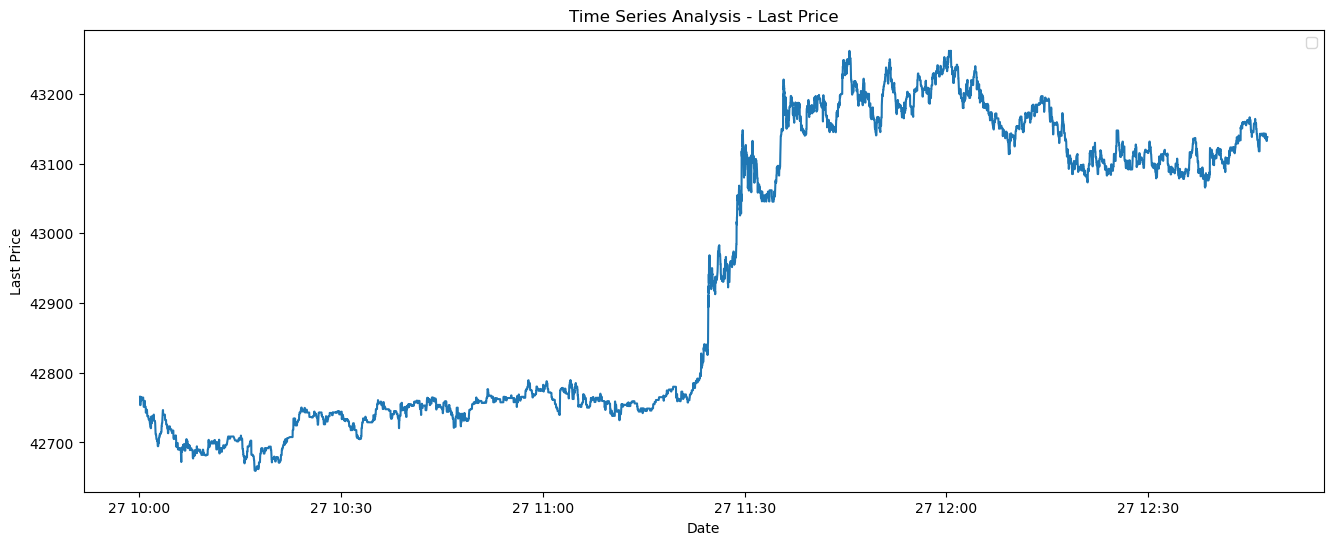

In [7]:
# Convert 'created_at' to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# Set 'created_at' as the index for time series analysis
df.set_index('created_at', inplace=True)

# Plot the time series data
plt.figure(figsize=(16, 6))
plt.plot(df['last_price'])
plt.title('Time Series Analysis - Last Price')
plt.xlabel('Date')
plt.ylabel('Last Price')
plt.legend()
plt.show()


In [8]:
# Display basic summary statistics
summary_stats = df.describe()
print(summary_stats)

                 id    last_price            f1           f2            f3  \
count  1.000000e+04  10000.000000  10000.000000  10000.00000  10000.000000   
mean   5.546190e+07  42938.580560      0.000414  20149.80990    -40.236010   
std    2.890879e+03    205.486455      0.000018   2897.95985      7.212493   
min    5.545690e+07  42659.500000      0.000397  15139.00000    -57.800000   
25%    5.545940e+07  42747.400000      0.000400  17642.00000    -46.000000   
50%    5.546190e+07  42835.850000      0.000408  20146.00000    -38.200000   
75%    5.546441e+07  43145.225000      0.000417  22652.25000    -34.500000   
max    5.546691e+07  43262.000000      0.000463  25196.00000    -22.100000   

                 f4            f5            f6            f7           f8  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.00000   
mean      42.252370      2.016360      0.523120      1.103560      2.29049   
std        9.346334      5.339766     12.883223     17.590602  

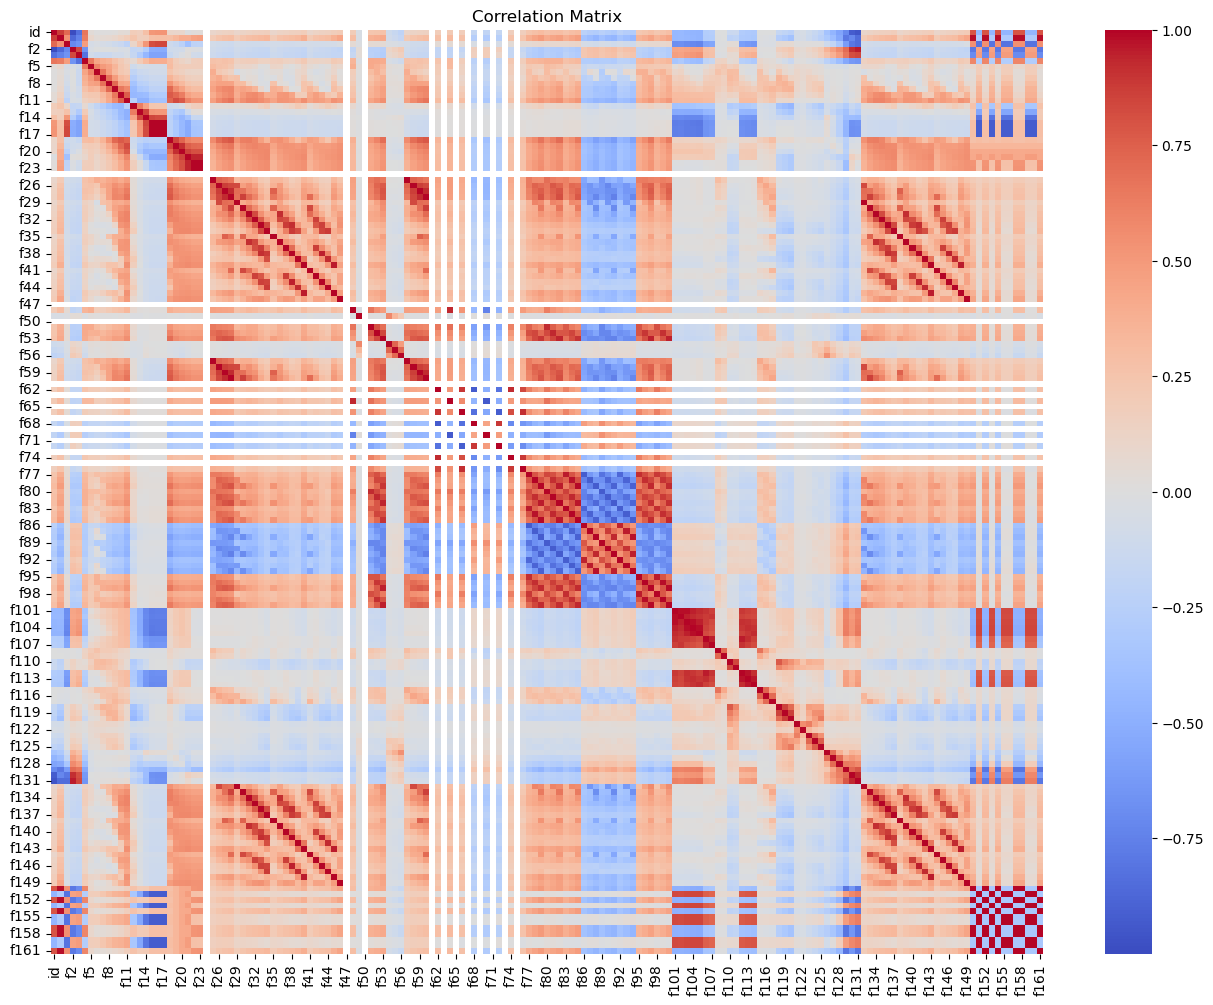

In [9]:
# Create a correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

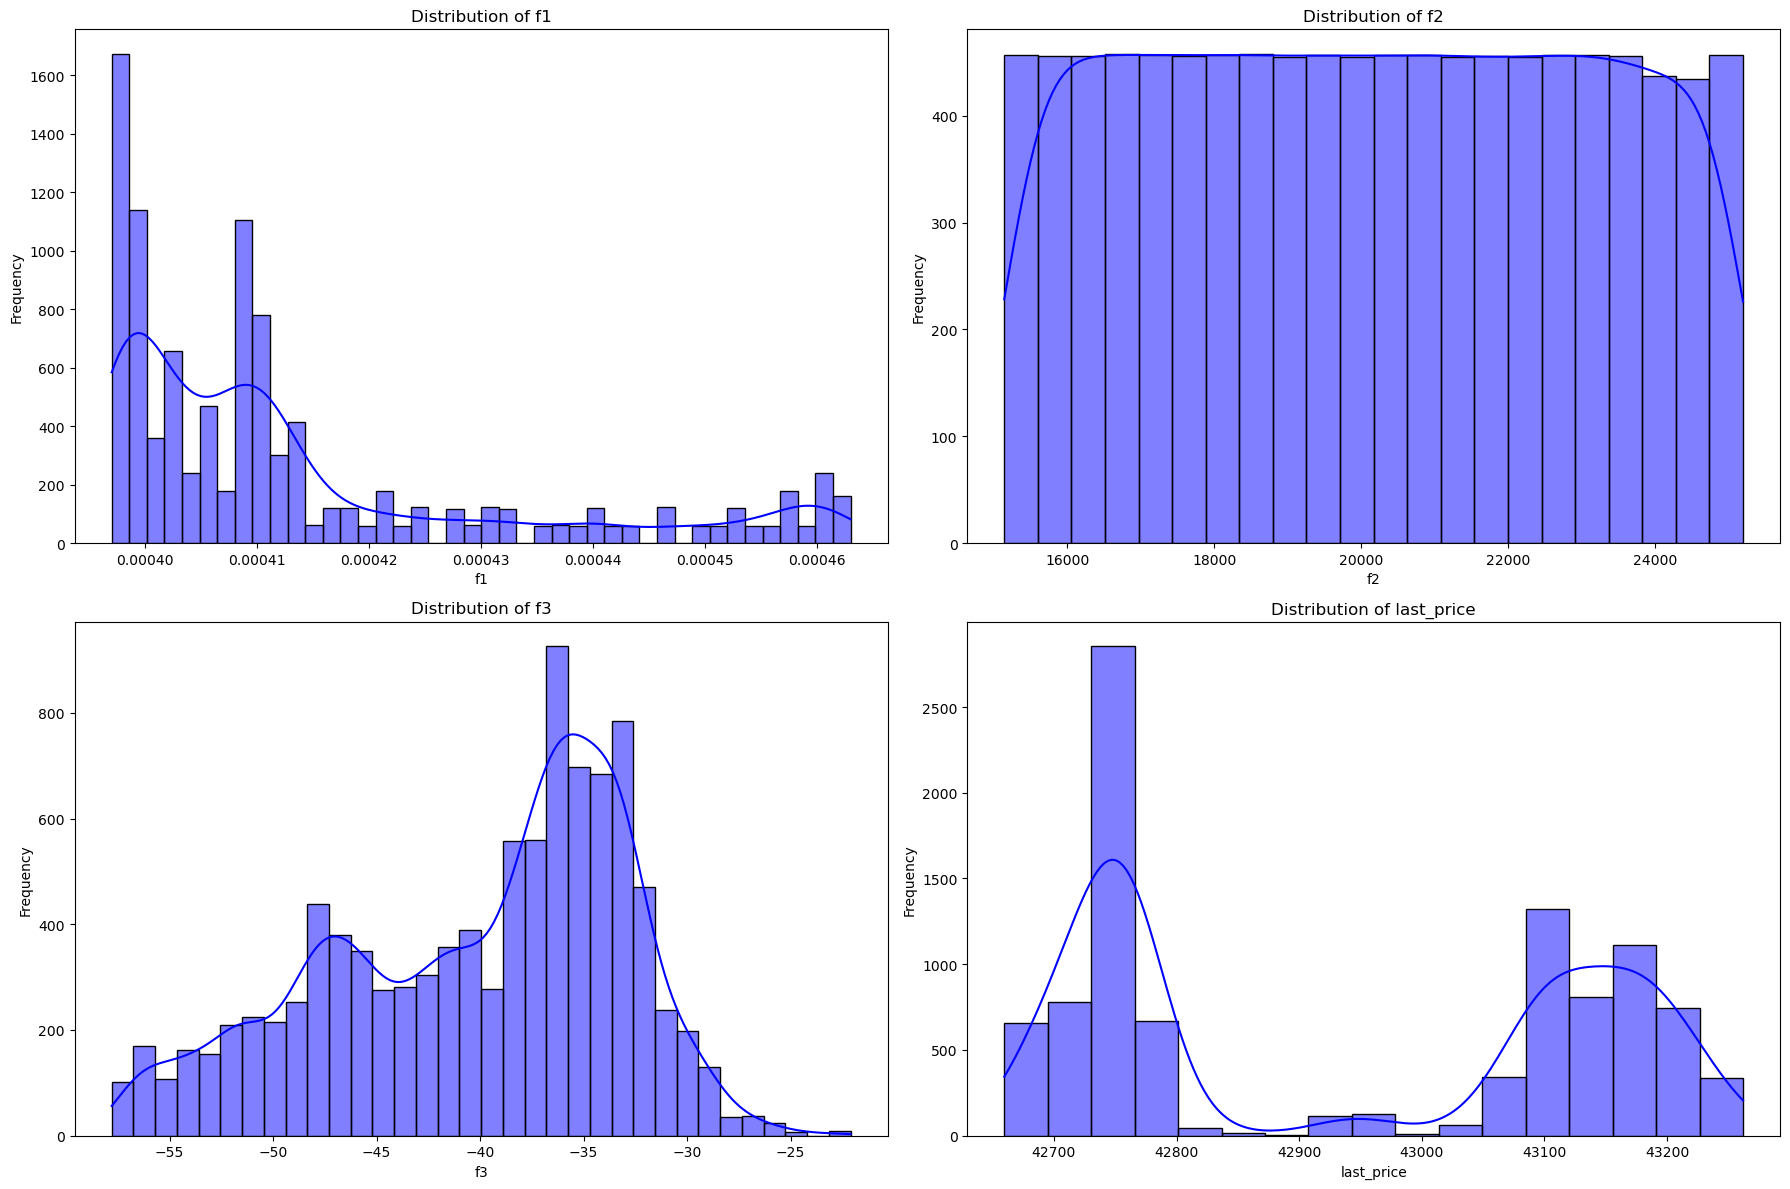

In [10]:
# Plot histograms for selected numerical features
selected_features = ['f1', 'f2', 'f3', 'last_price']

plt.figure(figsize=(18, 12))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature], kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [12]:
import pandas as pd

# Assuming 'created_at' is the timestamp column
# If it's not named 'created_at', please replace it with the actual name
timestamp_column = 'created_at'

# Convert 'created_at' to datetime format
df[timestamp_column] = pd.to_datetime(df[timestamp_column], errors='coerce')

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Drop rows with missing values in the timestamp column
df = df.dropna(subset=[timestamp_column])

# Set the timestamp column as the index
df.set_index(timestamp_column, inplace=True)

# Display basic summary statistics after cleaning
summary_stats_after_cleaning = df.describe()
print("Summary Statistics After Cleaning:\n", summary_stats_after_cleaning)


KeyError: 'created_at'

In [ ]:
# Display the column names in the dataset
print(df.columns)